# Finite Difference Methods for Steady States and Boundary Value Problems

## A simple finite difference method
As a first example of a finite difference method for solving a differential equation, consider the 2-point boundary value problem (BVP),
$$ u''(x) = f(x), \,\,\text{for}\,\, 0 < x < 1, $$
with some given boundary conditions
$$ u(0) = \alpha, \,\, u(1) = \beta.$$
The function $f(x)$ is specified and we wish to determine $u(x)$ in the interval $0 < x < 1$.

In [47]:
#%matplotlib notebook
%matplotlib inline

# environment setting, before any codes
import numpy as np
import scipy.linalg as slinalg

import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

### The very first step
The goal is to determine the function $u(x)$ by using the computer.  Therefore, the first question one has to ask is that __how is a function described in the computer__? 
* Gennerally, in computing science, a function is normally described as a discrete function (or say a grid function).

For one dimensional case, the task is rather simple.  We can compute the function only on certian discrete/grid points $x_0, x_1, \ldots, x_m, x_{m+1}$, where $x_j = jh$ and $h = 1/(m+1)$ is the _mesh width_.  For convenience, we denote $U_j$ is our approximation to the solution $u(x_j)$.

For example, considering $f(x) = \sin(\pi x)$ with $0 < x < 1$

In [48]:
m = 99
x = np.linspace(0, 1, m+2)
def generate_grid(left, right, m):
    h = (right - left)/(m+1)
    x = np.zeros(m+2)
    for j in range(m+2):
        x[j] = j*h
    return  x, h
x, h = generate_grid(0, 1, m)
print (x)
print (h)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
0.01


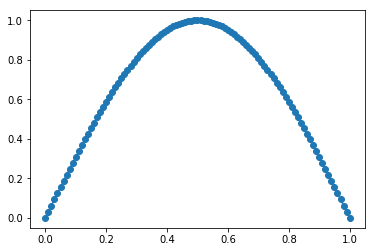

In [49]:
f = np.sin(np.pi*x)
#print (f)

plt.plot(x, f, 'o-')

### Boundary conditions
How to properly address the boundary conditions is normally a different problem for numerically solving PDEs.  However, for Dirichlet boundary conditions in one dimension that
$$ u(0) = \alpha, \,\, u(1) = \beta,$$ 
it is straightforward to address this issue.  Since we have $x_0 = 0$ and $x_{m+1} = 1$, we know that
$$ U_0 = \alpha, \,\, U_{m+1} = \beta.$$


### Finite difference method
Therefore, we have $m$ unknown values $U_1,\ldots, U_m$ to compute.  The idea of finite difference methods is replace the derivatives ($u''(x)$) in the BVP with finite difference approximation.  Here, we simply replace $u''(x)$ in the BVP by the centered difference approximation 
$$ D^2 U_j = \frac{1}{h}\left(U_{j-1} - 2 U_j + U_{j+1}\right),$$
then we obtain a set of linear equations 
$$ \frac{1}{h}\left(U_{j-1} - 2 U_j + U_{j+1}\right) = f(x_j) = f_j \quad\text{for}\,\, j = 1,\ldots, m.$$
Moving the known values ($U_0$ and $U_{m+1}$) to the right-hand side, we rewrite the algebraic system in the form
$$ AU = F,$$
where $U$ is the vector of unknowns $U = [U_1, U_2, \ldots, U_m]^T$ and 
$$
    A = \frac{1}{h^2}\left[\begin{array}{cccccc}
        -2 &  1 &    &   &    & \\
         1 & -2 &  1 &   &    & \\ 
           &  1 & -2 & 1 &    & \\
           & & \ddots & \ddots &\ddots &\\
           &    &    & 1 & -2 & 1 \\
           &    &    &   &  1 & -2 \end{array}\right],
           \quad
   F = \left[\begin{array}{c} f_1 - \frac{\alpha}{h^2} \\ f_2 \\ f_3 \\ \vdots \\ f_{m-1} \\ f_m - \frac{\beta}{h^2}\end{array}\right]. 
$$

In [50]:
def generate_A(h, m):
    A = np.eye(m, m, -1) - 2*np.eye(m, m) + np.eye(m, m, 1)
    return A/h**2

A = generate_A(1, 6)
print (A)
P, L, U = slinalg.lu(A)

[[-2.  1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1. -2.]]


In [51]:
def generate_F(h, m, x, alpha, beta, fun):
    F = np.zeros(m)
    for i in range(m):
        if (i == 0):
            F[i] = fun(x[i]) - alpha/h**2
        elif (i == np.size(x)):
            F[i] = fun(x[i]) - beta/h**2
        else:
            F[i] = fun(x[i])
    return F

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] 0.1
[[-200.  100.    0.    0.    0.    0.    0.    0.    0.]
 [ 100. -200.  100.    0.    0.    0.    0.    0.    0.]
 [   0.  100. -200.  100.    0.    0.    0.    0.    0.]
 [   0.    0.  100. -200.  100.    0.    0.    0.    0.]
 [   0.    0.    0.  100. -200.  100.    0.    0.    0.]
 [   0.    0.    0.    0.  100. -200.  100.    0.    0.]
 [   0.    0.    0.    0.    0.  100. -200.  100.    0.]
 [   0.    0.    0.    0.    0.    0.  100. -200.  100.]
 [   0.    0.    0.    0.    0.    0.    0.  100. -200.]]
[0.30901699 0.58778525 0.80901699 0.95105652 1.         0.95105652
 0.80901699 0.58778525 0.30901699]
solution:  [ 0.         -0.03156876 -0.06004735 -0.08264808 -0.09715865 -0.10215865
 -0.09715865 -0.08264808 -0.06004735 -0.03156876  0.        ]


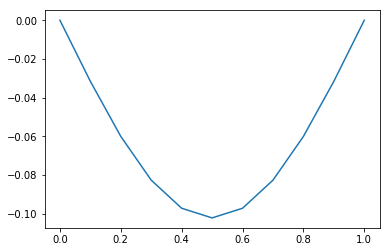

In [52]:
def fun(x):
    return np.sin(np.pi*x)

m = 9
x, h = generate_grid(0, 1, m)
print (x, h)
A = generate_A(h, m)
print (A)
F = generate_F(h, 9, x[1:m+1], 0, 0, fun)
print (F)
U = np.zeros(m+2)
U[0] = 0; U[m+1] = 0
U[1:m+1] = np.linalg.solve(A, F)
print ("solution: ", U)

plt.plot(x, U)
plt.show()

In [53]:
def exact_fun(x):
    return -1/np.pi**2*np.sin(np.pi*x)

def exact_U(x, exact_fun):
    exact_U = np.zeros(np.size(x))
    for i in range(np.size(x)):
        exact_U[i] = exact_fun(x[i])
    return exact_U

u = exact_U(x, exact_fun)
print ("exact: ", u)

exact:  [-0.00000000e+00 -3.13099676e-02 -5.95550975e-02 -8.19705595e-02
 -9.63621719e-02 -1.01321184e-01 -9.63621719e-02 -8.19705595e-02
 -5.95550975e-02 -3.13099676e-02 -1.24082663e-17]


In [54]:
error = U - u
print (error)
print ("Max Norm: ", np.max(np.abs(error)))

[ 0.00000000e+00 -2.58789938e-04 -4.92247713e-04 -6.77520853e-04
 -7.96473531e-04 -8.37461830e-04 -7.96473531e-04 -6.77520853e-04
 -4.92247713e-04 -2.58789938e-04  1.24082663e-17]
Max Norm:  0.0008374618303157583


### Finally, let us put everything together
Now, we put all steps together to create a function that solves the linear BVP, and return the max norm of the error.  

max norm error: 8.37e-04


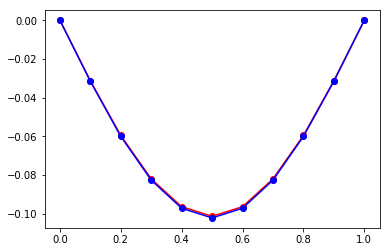

In [55]:
def FDM_BVP(m, left, right, alpha, beta, fun, exact_fun):
    # generate the grid
    x, h = generate_grid(left, right, m)
    #
    U = np.zeros(m+2)
    U[0] = alpha; U[m+1] = beta
    # 
    A = generate_A(h, m)
    F = generate_F(h, m, x[1:m+1], alpha, beta, fun)

    U[1:m+1] = np.linalg.solve(A, F)
    
    u = exact_U(x, exact_fun)
    return np.max(np.abs(U-u)), x, U, u

error, x, U, u = FDM_BVP(9, 0, 1, 0, 0, fun, exact_fun)

print ("max norm error: %7.2e" % error )
# let us plot the approximation solution in blue, and the exact solution in red
plt.plot(x, u, 'ro-')
plt.plot(x, U, 'bo-')

### Exercise
Considering the 2-point boundary value problem (BVP),
$$ u''(x) = \sin(\pi x), \,\,\text{for}\,\, 0 < x < 1, $$
with some given boundary conditions
$$ u(0) = 0, \,\, u(1) = 0.$$
The exact solution for this BVP is $u(x) = -\frac{1}{\pi^2}\sin(\pi x)$.
- Using the finite difference method to solve this problem with $h = 0.1, 0.05, 0.025, 0.0125$ (that is $m = 9, 19, 39, 79$)
- Computing the max norm errors, and how does the error change respect to $h$.
- Computing the $1$-norm error and the $2$-norm error.

## Neumann boundary conditions
Previously, we considered the Dirchlet boundary conditions, in that case, $U_0$ and $U_{m+1}$ is already known.  Now suppose that we have one or more Neumann boundary conditions instead of Dirichlet boundary conditions, meaning that a boundary condition on the derivative $u'$ is given rather than a condition on the value of $u$ itself. 

In this section, we consider the second order differential equation
$$ u''(x) = \sin(\pi x),\quad\text{for}\, 0 < x < 1, $$
with one Neumann condition,
$$ u'(0) = \sigma,\quad u(1) = \beta. $$

### Extend the matrix 
Before moving to Neumann boundary conditions, let us first extend the finite difference matrix for Drichlet boundary conditions to a more general form. Here, we consider $U_0$ and $U_{m+1}$ are also unknowns, and extend the matrix $A$ from size $m\times m$ to $(m+2)\times (m+2)$.  That is, for the interior part, 
$$
    A = \frac{1}{h^2}\left[\begin{array}{cccccccc}
    0  &  0 &   &    &   &    & & \\
    1  & -2 &  1 &    &   &    & &\\
       &  1 & -2 &  1 &   &    & &\\ 
       &    &  1 & -2 & 1 &    & &\\
       &    & & \ddots & \ddots &\ddots & &\\
       &    &    &    & 1 & -2 & 1  &\\
       &    &    &    &   &  1 & -2 & 1 \\
       &    &    &    &   &   &  0 & 0\end{array}\right],
           \quad
   F = \left[\begin{array}{c} 0 \\ f_1\\ f_2 \\ f_3 \\ \vdots \\ f_{m-1} \\ f_m \\0\end{array}\right]. 
$$
For Dirichlet boundary conditions, we fill the first row with $U_0 = \alpha$ and the last row with $U_{m+1} = \beta$, then 
$$
    A = \frac{1}{h^2}\left[\begin{array}{cccccccc}
    h^2  &  0 &   &    &   &    & & \\
    1  & -2 &  1 &    &   &    & &\\
       &  1 & -2 &  1 &   &    & &\\ 
       &    &  1 & -2 & 1 &    & &\\
       &    & & \ddots & \ddots &\ddots & &\\
       &    &    &    & 1 & -2 & 1  &\\
       &    &    &    &   &  1 & -2 & 1 \\
       &    &    &    &   &   &  0 & h^2\end{array}\right],
           \quad
   F = \left[\begin{array}{c} \alpha \\ f_1\\ f_2 \\ f_3 \\ \vdots \\ f_{m-1} \\ f_m \\ \beta\end{array}\right]. 
$$
Let us change the codes according to this extension:

max norm error: 7.18e-01


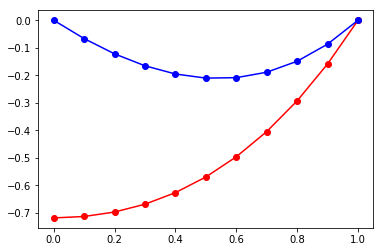

In [65]:
def generate_A_interior(h, m):
    A = np.zeros([m+2, m+2])
    for i in range(1,m+1):
        A[i, i-1] = 1
        A[i, i] = -2
        A[i, i+1] = 1
    #A[1:m+1,1:m+1] = - 2*np.eye(m, m) 
    #A[ += np.eye(m+2, m+2, -1) + np.eye(m+2, m+2, 1)
    return A/h**2

def generate_F_interior(h, m, x, fun):
    F = np.zeros(m+2)
    for i in range(1,m+1):
        F[i] = fun(x[i])
    return F

def Dirichlet_bc(A, F, alpha, beta, h):
    A[0,0] = 1
    A[-1,-1] = 1
    F[0] = alpha
    F[-1] = beta
    return A, F

def FDM_BVP2(m, left, right, alpha, beta, bc, fun, exact_fun):
    # generate the grid
    x, h = generate_grid(left, right, m)
    #
    U = np.zeros(m+2)
    # 
    A = generate_A_interior(h, m)
    #print (A)
    F = generate_F_interior(h, m, x, fun)
    #print (F)
    # bc
    A, F = bc(A, F, alpha, beta, h)
    #print (A)
    #print (F)
    U = np.linalg.solve(A, F)
    
    u = exact_U(x, exact_fun)
    return np.max(np.abs(U-u)), x, U, u

error, x, U, u = FDM_BVP2(9, 0, 1, 0, 0, Dirichlet_bc, fun, exact_fun)

print ("max norm error: %7.2e" % error )
# let us plot the approximation solution in blue, and the exact solution in red
plt.plot(x, u, 'ro-')
plt.plot(x, U, 'bo-')

In [66]:
# numerically verify the accuracy order
levels = 4
m = np.array([9, 19, 39, 79], int)
err_max = np.zeros(levels)
print ('   h      max error   order  ')
for i in range (levels):
    err_max[i],_,_,_ = FDM_BVP2(m[i], 0, 1, 0, 0, Dirichlet_bc, fun, exact_fun)
    if (i == 0):
        print ('%7.2e  %7.2e' % (1/(m[i]+1), err_max[i]))
    else:
        print ('%7.2e  %7.2e    %4.2f' % (1/(m[i]+1), err_max[i], \
                                        np.log(err_max[i-1]/err_max[i])/np.log((m[i]+1)/(m[i-1]+1))))

   h      max error   order  
1.00e-01  7.18e-01
5.00e-02  7.18e-01    -0.00
2.50e-02  7.18e-01    -0.00
1.25e-02  7.18e-01    -0.00


### Neumann boundary conditions 

In [67]:
def Neumann_bc1(A, F, alpha, beta, h):
    A[0,0] = -1/h
    A[0,1] = 1/h
    A[-1,-1] = 1
    F[0] = alpha
    F[-1] = beta
    return A, F

def Neumann_bc2(A, F, alpha, beta, h):
    #A[0,0] = 
    #A[0,1] = 
    A[-1,-1] = h**2
    #F[0] = 
    F[-1] = beta
    return A, F

def Neumann_bc3(A, F, alpha, beta, h):
    #A[0,0] = 
    #A[0,1] = 
    A[-1,-1] = h**2
    #F[0] = 
    F[-1] = beta
    return A, F

Considering the ODE,
$$ u''(x) = e^x, \,\,\text{for}\,\, 0 < x < 1, $$
with some given boundary conditions
$$ u'(0) = 0, \,\, u(1) = 0.$$
The exact solution for this problem is $u(x) = ?$.
- Using the finite difference method to solve this problem with $h = 0.1, 0.05, 0.025, 0.0125$ (that is $m = 9, 19, 39, 79$) with different approachs for the Neumann boundary conditions
- Computing the max norm errors, and how does the error change respect to $h$.
- Computing the $1$-norm error and the $2$-norm error.

max norm error: 5.23e-02


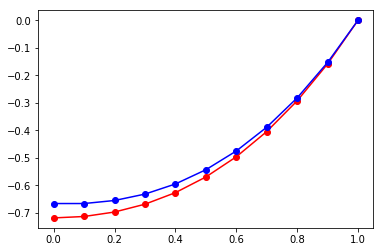

In [68]:
def fun(x):
    return np.exp(x)

def exact_fun(x):
    return np.exp(x) - x + 1 - np.e

error, x, U, u = FDM_BVP2(9, 0, 1, 0, 0, Neumann_bc1, fun, exact_fun)

print ("max norm error: %7.2e" % error )
# let us plot the approximation solution in blue, and the exact solution in red
plt.plot(x, u, 'ro-')
plt.plot(x, U, 'bo-')

In [69]:
levels = 4
m = np.array([9, 19, 39, 79], int)
err_max = np.zeros(levels)
print ('   h      max error   order  ')
for i in range (levels):
    err_max[i],_,_,_ = FDM_BVP2(m[i], 0, 1, 0, 0, Neumann_bc1, fun, exact_fun)
    if (i == 0):
        print ('%7.2e  %7.2e' % (1/(m[i]+1), err_max[i]))
    else:
        print ('%7.2e  %7.2e    %4.2f' % (1/(m[i]+1), err_max[i], \
                                        np.log(err_max[i-1]/err_max[i])/np.log((m[i]+1)/(m[i-1]+1))))

   h      max error   order  
1.00e-01  5.23e-02
5.00e-02  2.56e-02    1.03
2.50e-02  1.26e-02    1.02
1.25e-02  6.29e-03    1.01
